Install dependecies using either conda or pip:

1. rasterio using:

    a. install rasterio
        conda install -c conda-forge rasterio

    b. Then install linux dependencies (in Linux only)
        sudo add-apt-repository ppa:ubuntugis/ppa
        sudo apt-get update
        sudo apt-get install python-numpy gdal-bin libgdal-dev

2. Install matplotlib

    conda install -c conda-forge matplotlib

3. Install plotly

    conda install -c conda-forge plotly

In [1]:
!pip install rasterio
!pip install matplotlib
!pip install plotly

In [2]:
%load_ext autoreload
%autoreload 2

# USING RAW GEOTIFFs

In [3]:
import rasterio
from rasterio.plot import show
from matplotlib import pyplot

In [4]:
# ask for type input
# according to that, ask for visualization input
viz_type_global = input("Enter one of the following visualization type: \n1.full \n2.seasonal \n3.monthly \n4.diurnal \n5.daily\n ==>")

Enter one of the following visualization type: 
1.full 
2.seasonal 
3.monthly 
4.diurnal 
5.daily
 ==> seasonal


In [5]:
def handle_input_full():
    # do not need an input
    return False
    
def handle_input_seasonal():
    u_input = input("Enter the Season (Hint: \n1. spring \n2. summer \n3. autumn \n4. winter )\n==>")
    return u_input

def handle_input_monthly():
    u_input = input("Enter the Month (Hint: 01 - 12)\n==>")
    return u_input

def handle_input_diurnal():
    u_input = input("Enter the Durinals (Hint: 00 - 23)\n==>")
    return u_input

def handle_input_daily():
    u_input = input("Enter the a date yyyy-mm-dd format (Hint: 2013-01-21)\n==>")
    return u_input

input_switches = {
    "full" : handle_input_full,
    "seasonal" : handle_input_seasonal,
    "monthly" : handle_input_monthly,
    "diurnal" : handle_input_diurnal,
    "daily" : handle_input_daily
}

type_data_ip_global = input_switches[viz_type_global]()

Enter the Season (Hint: 
1. spring 
2. summer 
3. autumn 
4. winter )
==> winter


In [6]:
print(viz_type_global)
print(type_data_ip_global)

seasonal
winter


Warning 1: HTTP response code on https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRSC_LIS_FRD_cogs/VHRSC_LIS_FRD_Season_4.0_co.tif.msk: 403
Warning 1: HTTP response code on https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRSC_LIS_FRD_cogs/VHRSC_LIS_FRD_Season_4.0_co.tif.MSK: 403


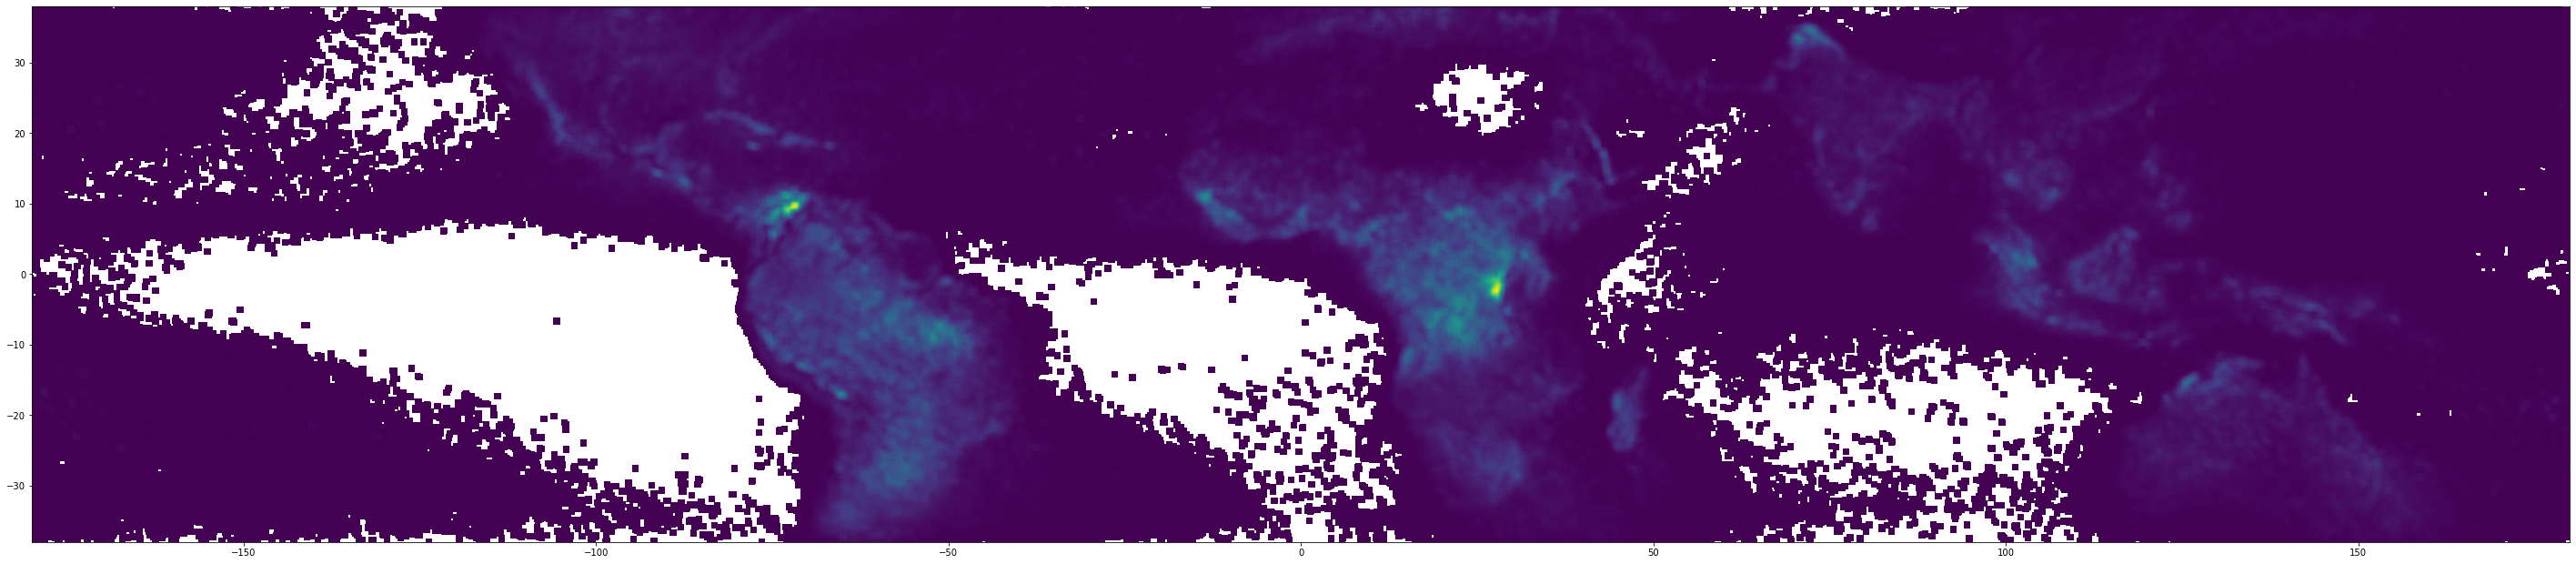

Geotiff url: https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRSC_LIS_FRD_cogs/VHRSC_LIS_FRD_Season_4.0_co.tif


In [18]:
def visuzalize_GEOTIFF(layer_url):
    dataset = rasterio.open(layer_url)
    pyplot.figure(figsize=(50, 25))
    # pyplot.imshow(dataset.read(1), cmap='gray')
    # pyplot.show(dataset)
    show(dataset)
    # show(dataset.read(), transform=dataset.transform)
    pass

def formulate_url_geotiff(type_c, date_c):
    baseurl = "https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS"

    type_codes = {
        "full": "VHRFC",
        "seasonal": "VHRSC",
        "monthly" : "VHRMC",
        "diurnal" : "VHRDC",
        "daily" : "VHRAC"
    }
    
    type_data_types = {
        "full" : "Full",
        "seasonal" : "Season",
        "monthly" : "Month",
        "diurnal" : "Time",
        "daily" : "Time"
    }

    # The URL to fetch geotif image according to the input types
    return f'{baseurl}/{type_codes[type_c]}_LIS_FRD_cogs/{type_codes[type_c]}_LIS_FRD_{type_data_types[type_c]}_{date_c}.0_co.tif'
    
# what handlers do is:
    # looks for the global date
    # manage the date
    # Formulate the url
    # use url for visuzalization

def handle_full_geotiff():
    viz_date = "201301"
    viz_type = "full"
    # only single file, so no need to formulate url
    viz_url = "https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRFC_LIS_FRD_co.tif"
    visuzalize_GEOTIFF(viz_url)
    print("Geotiff url: " + viz_url)

def handle_seasonal_geotiff():
    u_input = type_data_ip_global
    season_date_map = { 
        "spring": "1",
        "summer": "2",
        "autumn": "3",
        "winter": "4"
    }
    viz_date = season_date_map[u_input]
    viz_type = "seasonal"
    viz_url = formulate_url_geotiff(viz_type, viz_date)
    visuzalize_GEOTIFF(viz_url)
    print("Geotiff url: " + viz_url)

def handle_monthly_geotiff():
    u_input = type_data_ip_global
    viz_date = int(u_input)
    viz_type = "monthly"
    viz_url = formulate_url_geotiff(viz_type, viz_date)
    visuzalize_GEOTIFF(viz_url)
    print("COG url: " + viz_url)    


def handle_diurnal_geotiff():
    u_input = input("Enter the Durinals (Hint: 00 - 23)\n==>")
    # todo: check input validation
    # if even, 01st of month
    # if odd, 15th of month
    season_date_map = {
        "00": "2013_01_01" , "01": "2013_01_15" , "02": "2013_02_01" , "03": "2013_02_15" , "04": "2013_03_01" , "05": "2013_03_15" ,
        "06": "2013_04_01" , "07": "2013_04_15" , "08": "2013_05_01" , "09": "2013_05_15" , "10": "2013_06_01" , "11": "2013_06_15" ,
        "12": "2013_07_01" , "13": "2013_07_15" , "14": "2013_08_01" , "15": "2013_08_15" , "16": "2013_09_01" , "17": "2013_09_15" ,
        "18": "2013_10_01" , "19": "2013_10_15" , "20": "2013_11_01" , "21": "2013_11_15" , "22": "2013_12_01" , "23": "2013_12_15"
    }
    viz_date = season_date_map[u_input]
    viz_type = "diurnal"
    viz_url = formulate_url_geotiff(viz_type, viz_date)
    visuzalize_GEOTIFF(viz_url)
    print("COG url: " + viz_url)

def handle_daily_geotiff():
    u_input = input("Enter the a date yyyy-mm-dd format (Hint: 2013-01-21)\n==>")
    # TODO: validation check
    viz_date = u_input.replace('-', '_')
    viz_type = "daily"
    viz_url = formulate_url_geotiff(viz_type, viz_date)
    visuzalize_GEOTIFF(viz_url)
    print("COG url: " + viz_url)

viz_handle_switches = {
    "full" : handle_full_geotiff,
    "seasonal" : handle_seasonal_geotiff,
    "monthly" : handle_monthly_geotiff,
    "diurnal" : handle_diurnal_geotiff,
    "daily" : handle_daily_geotiff
}

url_new = viz_handle_switches[viz_type_global]()

In [ ]:
import rasterio
from rasterio.plot import show
from matplotlib import pyplot

In [ ]:
# base configs and dictonary defination
baseurl = "https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS"

types_CGTIF = {
     "annual": { "name": "VHRAC", "dt": "Time"},
     "daily": { "name": "VHRDC", "dt": "Time"},
     "monthly": { "name": "VHRMC", "dt": "Month"},
     "season": { "name": "VHRSC", "dt": "Season"}
     #add for full
}

In [ ]:
type_ip = input("Enter one of the following type: \n1.annual \n2.daily \n3.monthly \n2.season \n ==>")

In [ ]:
# Take inputs and based off it, generate URL
# type_ip = "monthly" # change it; take input
type = types_CGTIF[type_ip]
#data = "input data according to type_ip name" #maybe put a validation


In [ ]:
if(type_ip == "annual"):
    data = input("Enter day number (Hint: 1 to 365)")
elif(type_ip == "daily"):
    data = input("Enter hour (Hint: 24 hour format i.e. 0 to 23)")
elif(type_ip == "monthly"):
    data = input("Enter month number (Hint: 1 to 12)")
elif(type_ip == "season"):
    data = input("Enter season number (Hint: 1 to 4)")
else:
    print("wrong type input.")

In [ ]:
# The URL to fetch geotif image according to the input types
URL = f'{baseurl}/{type["name"]}_LIS_FRD_cogs/{type["name"]}_LIS_FRD_{type["dt"]}_{data}.0_co.tif'
print(URL)

In [ ]:

dataset = rasterio.open(URL)
pyplot.figure(figsize=(50, 25))
# pyplot.imshow(dataset.read(1), cmap='gray')
# pyplot.show(dataset)
show(dataset)
# show(dataset.read(), transform=dataset.transform)

# Using COG 

In [ ]:
import plotly.io as pio
import plotly.express as px
import pandas as pd

# pio.renderers.default = 'colab'
pio.renderers.default = 'jupyterlab'

In [ ]:
viz_type = input("Enter one of the following visualization type: \n1.full \n2.seasonal \n3.monthly \n4.diurnal \n5.daily\n ==>")

In [ ]:
def visuzalize_COG(layer_url):
    # seed value, for mapbox to load in colab
    df = pd.DataFrame([[1001, 5.3],[1001, 5.3]])
    df.columns = ["flips", "unemp"]
    fig = px.choropleth_mapbox(
                                df, 
                                color='unemp',
                                color_continuous_scale="Viridis",
                                range_color=(0, 12),
                                mapbox_style="carto-positron",
                                zoom=4, center = {"lat": 37.0902, "lon": -95.7129},
                                opacity=0.5,
                              )

    fig.update_layout(
        mapbox_layers=[
            {
                "sourcetype": "raster",
                "source": [layer_url]
            }
          ])
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    # print(fig.layout.mapbox.layers)
    fig.update_layout(mapbox_style="stamen-terrain")
    fig.layout.mapbox.zoom = 1
    fig.show()

#apply switch cases:

    
def formulate_url(type_c, date_c):
    cog_base_url = "https://wug8w3fg42.execute-api.us-west-2.amazonaws.com/development/singleband"
    
    type_date_url_end_mapping = {
        "full": "LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0.325,23.426]",
        "seasonal": "LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0.00010455249866936356,0.06766455620527267]",
        "monthly" : "LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0.00010455249866936356,0.06766455620527267]",
        "diurnal" : "LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0,0.002]",
        "daily" : "LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0.00010455249866936356,0.06766455620527267]"
    }

    type_codes = {
        "full": "VHRFC",
        "seasonal": "VHRSC",
        "monthly" : "VHRMC",
        "diurnal" : "VHRDC",
        "daily" : "VHRAC"
    }
    # TODO: try catch error handling.
    cog_url_build = f"{type_codes[type_c]}/{date_c}"

    return f"{cog_base_url}/{cog_url_build}/{type_date_url_end_mapping[type_c]}"

# what handlers do is:
    # It is a pure function that:
    # ask for the date
    # manage the date
    # Formulate the url
    # use url for visuzalization

def handle_full():
    viz_date = "201301"
    viz_type = "full"
    viz_url = formulate_url(viz_type, viz_date)
    visuzalize_COG(viz_url)
    print("COG url: " + viz_url)    

def handle_seasonal():
    u_input = input("Enter the Season (Hint: \n1. spring \n2. summer \n3. autumn \n4. winter )\n==>")
    season_date_map = { 
        "spring": "2013_03_01",
        "summer": "2013_07_01",
        "autumn": "2013_10_01",
        "winter": "2013_12_01"
    }
    viz_date = season_date_map[u_input]
    viz_type = "seasonal"
    viz_url = formulate_url(viz_type, viz_date)
    visuzalize_COG(viz_url)
    print("COG url: " + viz_url)

def handle_monthly():
    u_input = input("Enter the Month (Hint: 01 - 12)\n==>")
    # todo: check input validation
    viz_date = f"2013{u_input}"
    viz_type = "monthly"
    viz_url = formulate_url(viz_type, viz_date)
    visuzalize_COG(viz_url)
    print("COG url: " + viz_url)    


def handle_diurnal():
    u_input = input("Enter the Durinals (Hint: 00 - 23)\n==>")
    # todo: check input validation
    # if even, 01st of month
    # if odd, 15th of month
    season_date_map = {
        "00": "2013_01_01" , "01": "2013_01_15" , "02": "2013_02_01" , "03": "2013_02_15" , "04": "2013_03_01" , "05": "2013_03_15" ,
        "06": "2013_04_01" , "07": "2013_04_15" , "08": "2013_05_01" , "09": "2013_05_15" , "10": "2013_06_01" , "11": "2013_06_15" ,
        "12": "2013_07_01" , "13": "2013_07_15" , "14": "2013_08_01" , "15": "2013_08_15" , "16": "2013_09_01" , "17": "2013_09_15" ,
        "18": "2013_10_01" , "19": "2013_10_15" , "20": "2013_11_01" , "21": "2013_11_15" , "22": "2013_12_01" , "23": "2013_12_15"
    }
    viz_date = season_date_map[u_input]
    viz_type = "diurnal"
    viz_url = formulate_url(viz_type, viz_date)
    visuzalize_COG(viz_url)
    print("COG url: " + viz_url)

def handle_daily():
    u_input = input("Enter the a date yyyy-mm-dd format (Hint: 2013-01-21)\n==>")
    # TODO: validation check
    viz_date = u_input.replace('-', '_')
    viz_type = "daily"
    viz_url = formulate_url(viz_type, viz_date)
    visuzalize_COG(viz_url)
    print("COG url: " + viz_url)

switches = {
    "full" : handle_full,
    "seasonal" : handle_seasonal,
    "monthly" : handle_monthly,
    "diurnal" : handle_diurnal,
    "daily" : handle_daily
}

url_new = switches[viz_type]()

If the visualization is not showing, use appropriate `pio.renderers.default`, according to the platform that the notebook is running. (Hint. for `Jupyterlab`, `pio.renderers.default = 'jupyterlab'`, for `Google colab`, `pio.renderers.default = 'colab'`)

In [22]:
l = "12"
li = int(l)
li

12